In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

In [ ]:

def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')

    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

In [ ]:

def scrape_news_over_date_range(query, start_date, end_date):
    # Convert start and end dates to datetime objects
    start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

    # Initialize an empty DataFrame to store all articles
    all_articles = pd.DataFrame()

    # Loop through each month in the date range
    current_date = start_date_dt
    while current_date < end_date_dt:
        # Define the next month's start date
        next_date = current_date + datetime.timedelta(days=30)

        # Ensure the end date does not go beyond the specified end_date
        if next_date > end_date_dt:
            next_date = end_date_dt

        # Format dates to strings
        start_str = current_date.strftime('%Y-%m-%d')
        end_str = next_date.strftime('%Y-%m-%d')

        # Scrape news for the current month
        month_articles = scrape_news(query, start_str, end_str)

        # Append month articles to the all_articles DataFrame
        all_articles = pd.concat([all_articles, month_articles], ignore_index=True)

        # Move to the next month
        current_date = next_date

    return all_articles

In [ ]:

# Define the date range and queries
start_date = '2014-01-01'
end_date = '2019-12-31'
queries = ["Amazon", "Nvidia"]

# Loop through each query and scrape news articles
for query in queries:
    articles = scrape_news_over_date_range(query, start_date, end_date)
    output_csv = f"{query}.csv"
    articles.to_csv(output_csv, index=False)
    print(f"Saved {query} articles to {output_csv}")


Saved Amazon articles to Amazon.csv
Saved Nvidia articles to Nvidia.csv


In [ ]:
news_df1 = pd.read_csv('Amazon.csv')
news_df2 = pd.read_csv('Nvidia.csv')



In [ ]:
news_df1

,title,link,pub_date
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,"Thu, 16 Jan 2014 08:00:00 GMT"
1,Why Amazon's Anticipatory Shipping Is Pure Gen...,https://news.google.com/rss/articles/CBMiZWh0d...,"Tue, 28 Jan 2014 08:00:00 GMT"
2,Amazon Knows What You Want Before You Buy It -...,https://news.google.com/rss/articles/CBMicGh0d...,"Mon, 27 Jan 2014 08:00:00 GMT"
3,Amazon plans to ship your packages before you ...,https://news.google.com/rss/articles/CBMiZmh0d...,"Sat, 18 Jan 2014 08:00:00 GMT"
4,"Amazon Patents ""Anticipatory"" Shipping -- To S...",https://news.google.com/rss/articles/CBMiM2h0d...,"Sat, 18 Jan 2014 08:00:00 GMT"
...,...,...,...
7295,Introducing Amazon EventBridge schema registry...,https://news.google.com/rss/articles/CBMibWh0d...,"Sun, 01 Dec 2019 08:00:00 GMT"
7296,Amazon EMR is now available in your data cente...,https://news.google.com/rss/articles/CBMidWh0d...,"Tue, 03 Dec 2019 08:00:00 GMT"
7297,"Amazon Leases New Manhattan Office Space, Less...",https://news.google.com/rss/articles/CBMidGh0d...,"Fri, 06 Dec 2019 08:00:00 GMT"
7298,Amazon will open a new office in New York City...,https://news.google.com/rss/articles/CBMiUmh0d...,"Fri, 06 Dec 2019 08:00:00 GMT"


In [ ]:
news_df2

,title,link,pub_date
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,"Tue, 14 Jan 2014 08:00:00 GMT"
1,Mysterious Computer Chip Crop Circle Is An Nvi...,https://news.google.com/rss/articles/CBMiNWh0d...,"Sun, 05 Jan 2014 08:00:00 GMT"
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,"Mon, 06 Jan 2014 08:00:00 GMT"
3,NVIDIA G-Sync DIY Upgrade Kit Installation and...,https://news.google.com/rss/articles/CBMiXGh0d...,"Sun, 05 Jan 2014 08:00:00 GMT"
4,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,"Mon, 06 Jan 2014 08:00:00 GMT"
...,...,...,...
6477,How to deploy ONNX models on NVIDIA Jetson Nan...,https://news.google.com/rss/articles/CBMibGh0d...,"Wed, 04 Dec 2019 08:00:00 GMT"
6478,"Nvidia’s Latest SoC Zeros in on Auto, Robotic ...",https://news.google.com/rss/articles/CBMidWh0d...,"Thu, 19 Dec 2019 08:00:00 GMT"
6479,Nvidia Shows a Beautiful Video From Microsoft ...,https://news.google.com/rss/articles/CBMia2h0d...,"Tue, 31 Dec 2019 08:00:00 GMT"
6480,Nvidia launches 'world's most advanced' chip f...,https://news.google.com/rss/articles/CBMihQFod...,"Wed, 18 Dec 2019 08:00:00 GMT"


# **Applying NLP for pre processing of news text**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df1['cleaned_text'] = news_df1['title'].apply(clean_text)
news_df2['cleaned_text'] = news_df2['title'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
news_df1

,title,link,pub_date,cleaned_text
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,"Thu, 16 Jan 2014 08:00:00 GMT",amazon crushed union movement time time
1,Why Amazon's Anticipatory Shipping Is Pure Gen...,https://news.google.com/rss/articles/CBMiZWh0d...,"Tue, 28 Jan 2014 08:00:00 GMT",amazon anticipatory shipping pure genius forbes
2,Amazon Knows What You Want Before You Buy It -...,https://news.google.com/rss/articles/CBMicGh0d...,"Mon, 27 Jan 2014 08:00:00 GMT",amazon knows want buy machine learning times
3,Amazon plans to ship your packages before you ...,https://news.google.com/rss/articles/CBMiZmh0d...,"Sat, 18 Jan 2014 08:00:00 GMT",amazon plans ship packages even buy verge
4,"Amazon Patents ""Anticipatory"" Shipping -- To S...",https://news.google.com/rss/articles/CBMiM2h0d...,"Sat, 18 Jan 2014 08:00:00 GMT",amazon patents anticipatory shipping start sen...
...,...,...,...,...
7295,Introducing Amazon EventBridge schema registry...,https://news.google.com/rss/articles/CBMibWh0d...,"Sun, 01 Dec 2019 08:00:00 GMT",introducing amazon eventbridge schema registry...
7296,Amazon EMR is now available in your data cente...,https://news.google.com/rss/articles/CBMidWh0d...,"Tue, 03 Dec 2019 08:00:00 GMT",amazon emr available data center aws outposts ...
7297,"Amazon Leases New Manhattan Office Space, Less...",https://news.google.com/rss/articles/CBMidGh0d...,"Fri, 06 Dec 2019 08:00:00 GMT",amazon leases new manhattan office space less ...
7298,Amazon will open a new office in New York City...,https://news.google.com/rss/articles/CBMiUmh0d...,"Fri, 06 Dec 2019 08:00:00 GMT",amazon open new office new york city 2021 cnn


In [ ]:
news_df2

,title,link,pub_date,cleaned_text
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,"Tue, 14 Jan 2014 08:00:00 GMT",nvidia names shannon chief administrative offi...
1,Mysterious Computer Chip Crop Circle Is An Nvi...,https://news.google.com/rss/articles/CBMiNWh0d...,"Sun, 05 Jan 2014 08:00:00 GMT",mysterious computer chip crop circle nvidia ce...
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,"Mon, 06 Jan 2014 08:00:00 GMT",nvidia tegra k1 preview architecture analysis ...
3,NVIDIA G-Sync DIY Upgrade Kit Installation and...,https://news.google.com/rss/articles/CBMiXGh0d...,"Sun, 05 Jan 2014 08:00:00 GMT",nvidia g sync diy upgrade kit installation per...
4,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,"Mon, 06 Jan 2014 08:00:00 GMT",nvidia geforce ulp k1 tegra k1 notebookcheck net
...,...,...,...,...
6477,How to deploy ONNX models on NVIDIA Jetson Nan...,https://news.google.com/rss/articles/CBMibGh0d...,"Wed, 04 Dec 2019 08:00:00 GMT",deploy onnx models nvidia jetson nano using de...
6478,"Nvidia’s Latest SoC Zeros in on Auto, Robotic ...",https://news.google.com/rss/articles/CBMidWh0d...,"Thu, 19 Dec 2019 08:00:00 GMT",nvidia latest soc zeros auto robotic apps elec...
6479,Nvidia Shows a Beautiful Video From Microsoft ...,https://news.google.com/rss/articles/CBMia2h0d...,"Tue, 31 Dec 2019 08:00:00 GMT",nvidia shows beautiful video microsoft flight ...
6480,Nvidia launches 'world's most advanced' chip f...,https://news.google.com/rss/articles/CBMihQFod...,"Wed, 18 Dec 2019 08:00:00 GMT",nvidia launches world advanced chip robotics a...


# **Extracting the details of amazon and nvidia stock prices from 1st jan 2014 to 31st Dec 2019**

In [ ]:
import yfinance as yf
import pandas as pd
import datetime

# Define the date range
start_date = '2014-01-01'
end_date = '2019-12-31'

# Define stock symbols for the amazon and flipkart
stock_symbols = {
    'Amazon': 'AMZN',
    'Nvidia': 'NVDA'
}

# Download and save historical stock prices for each company
for company, symbol in stock_symbols.items():
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    output_csv = f'{company}_stock_prices.csv'
    stock_data.to_csv(output_csv, index=False)
    print(f"Saved {company} stock prices to {output_csv}")

# Display the first few rows of each stock price dataset
for company in stock_symbols.keys():
    stock_df = pd.read_csv(f'{company}_stock_prices.csv')
    print(f"\n{company} Stock Prices:")
    print(stock_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Saved Amazon stock prices to Amazon_stock_prices.csv
Saved Nvidia stock prices to Nvidia_stock_prices.csv

Amazon Stock Prices:
         Date       Open     High        Low      Close  Adj Close    Volume
0  2014-01-02  19.940001  19.9680  19.701000  19.898500  19.898500  42756000
1  2014-01-03  19.914499  20.1355  19.811001  19.822001  19.822001  44204000
2  2014-01-06  19.792500  19.8500  19.421000  19.681499  19.681499  63412000
3  2014-01-07  19.752001  19.9235  19.714500  19.901501  19.901501  38320000
4  2014-01-08  19.923500  20.1500  19.802000  20.096001  20.096001  46330000

Nvidia Stock Prices:
         Date     Open    High      Low    Close  Adj Close     Volume
0  2014-01-02  0.39800  0.3995  0.39300  0.39650   0.374024  260092000
1  2014-01-03  0.39725  0.3980  0.39050  0.39175   0.369543  259332000
2  2014-01-06  0.39575  0.4000  0.39200  0.39700   0.374496  409492000
3  2014-01-07  0.40100  0.4050  0.39825  0.40350   0.380627  333288000
4  2014-01-08  0.40500  0.4110  0

In [ ]:
stock_df1 = pd.read_csv('Amazon_stock_prices.csv')
stock_df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000
1,2014-01-03,19.914499,20.135500,19.811001,19.822001,19.822001,44204000
2,2014-01-06,19.792500,19.850000,19.421000,19.681499,19.681499,63412000
3,2014-01-07,19.752001,19.923500,19.714500,19.901501,19.901501,38320000
4,2014-01-08,19.923500,20.150000,19.802000,20.096001,20.096001,46330000
...,...,...,...,...,...,...,...
1504,2019-12-23,89.413002,89.650002,89.225502,89.650002,89.650002,42728000
1505,2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000
1506,2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000
1507,2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000


In [ ]:
stock_df2 = pd.read_csv('Nvidia_stock_prices.csv')
stock_df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,0.39800,0.39950,0.39300,0.39650,0.374024,260092000
1,2014-01-03,0.39725,0.39800,0.39050,0.39175,0.369543,259332000
2,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000
3,2014-01-07,0.40100,0.40500,0.39825,0.40350,0.380627,333288000
4,2014-01-08,0.40500,0.41100,0.40350,0.40900,0.385815,308192000
...,...,...,...,...,...,...,...
1504,2019-12-23,6.01300,6.04525,5.95975,5.97050,5.946494,355060000
1505,2019-12-24,5.95500,5.98275,5.92050,5.96550,5.941513,138864000
1506,2019-12-26,5.96900,6.00800,5.95000,5.97975,5.955706,182852000
1507,2019-12-27,5.99500,6.00850,5.89525,5.92175,5.897940,254644000


# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df1['sentiment'] = news_df1['cleaned_text'].apply(get_sentiment)
news_df2['sentiment'] = news_df2['cleaned_text'].apply(get_sentiment)


# **Merge all csv files into final one**

In [ ]:
def merge_data(news_df, stock_df, company):
    news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date
    stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

    # Merge data on the date
    merged_df = pd.merge(news_df, stock_df, left_on='pub_date', right_on='Date', how='inner')

    # Check if merged_df is empty
    if merged_df.empty:
        print(f"The merged DataFrame for {company} is empty. Please check the date ranges and formats.")
    else:
        output_csv = f'merged_data_{company}.csv'
        merged_df.to_csv(output_csv, index=False)
        print(f"Merged data for {company}:")
        print(merged_df.head())

    return merged_df # Add this line to return the merged DataFrame

# Merge datasets for each company and store them in variables|
merged_df1 = merge_data(news_df1, stock_df1, 'Amazon')
merged_df2 = merge_data(news_df2, stock_df2, 'Nvidia')


Merged data for Amazon:
                                               title  \
0  How Amazon Crushed the Union Movement | TIME -...   
1  Sugarless Haribo Gummy Bear Reviews On Amazon ...   
2  Reviews Haribo's Sugarless Gummy Bears - Busin...   
3  First Union Vote At An Amazon Warehouse In The...   
4  Joe Tsai ’86, ’90JD: Amazon who? | Newsmaker -...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMiO2h0d...  2014-01-16   
1  https://news.google.com/rss/articles/CBMibmh0d...  2014-01-16   
2  https://news.google.com/rss/articles/CBMiTGh0d...  2014-01-16   
3  https://news.google.com/rss/articles/CBMiW2h0d...  2014-01-16   
4  https://news.google.com/rss/articles/CBMiSmh0d...  2014-01-16   

                                        cleaned_text  sentiment        Date  \
0            amazon crushed union movement time time     -0.100  2014-01-16   
1  sugarless haribo gummy bear reviews amazon ins...     -1.000  2014-01

Text(0, 0.5, 'Sentiment')

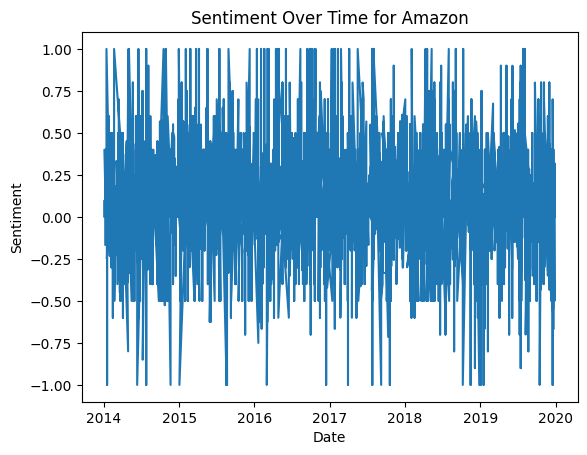

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_df1['Date'],merged_df1['sentiment'])
plt.title(f'Sentiment Over Time for Amazon')
plt.xlabel('Date')
plt.ylabel('Sentiment')

In [ ]:
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,2014-01-16,amazon crushed union movement time time,-0.100,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000
1,Sugarless Haribo Gummy Bear Reviews On Amazon ...,https://news.google.com/rss/articles/CBMibmh0d...,2014-01-16,sugarless haribo gummy bear reviews amazon ins...,-1.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000
2,Reviews Haribo's Sugarless Gummy Bears - Busin...,https://news.google.com/rss/articles/CBMiTGh0d...,2014-01-16,reviews haribo sugarless gummy bears business ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000
3,First Union Vote At An Amazon Warehouse In The...,https://news.google.com/rss/articles/CBMiW2h0d...,2014-01-16,first union vote amazon warehouse u fails wbur...,-0.125,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000
4,"Joe Tsai ’86, ’90JD: Amazon who? | Newsmaker -...",https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-16,joe tsai 86 90jd amazon newsmaker yale alumni ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000
...,...,...,...,...,...,...,...,...,...,...,...,...
6631,I Met Jeff Bezos in 1995 When He Had a Lame-Lo...,https://news.google.com/rss/articles/CBMiXGh0d...,2019-12-27,met jeff bezos 1995 lame looking website calle...,-0.500,2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000
6632,Autonomous trucks plus drones? There's an Amaz...,https://news.google.com/rss/articles/CBMibmh0d...,2019-12-24,autonomous trucks plus drones amazon patent ge...,0.400,2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000
6633,Amazon’s fight with Trump is about much more t...,https://news.google.com/rss/articles/CBMiLGh0d...,2019-12-10,amazon fight trump much 10bn bbc com,0.200,2019-12-10,87.370003,87.533501,86.750000,86.960503,86.960503,50286000
6634,The story behind Amazon's failed $1 million bi...,https://news.google.com/rss/articles/CBMiXmh0d...,2019-12-10,story behind amazon failed 1 million bid swing...,-0.450,2019-12-10,87.370003,87.533501,86.750000,86.960503,86.960503,50286000


Text(0, 0.5, 'Sentiment')

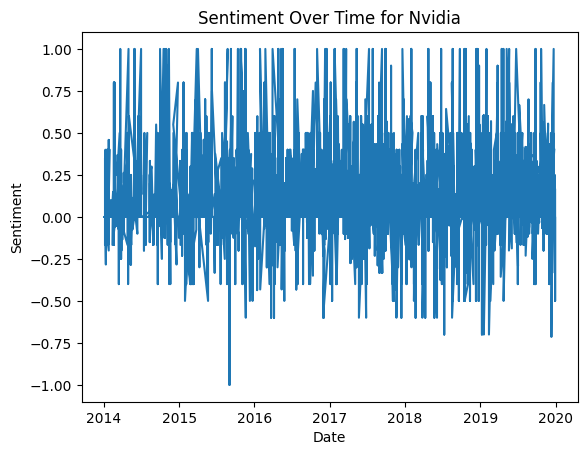

In [ ]:
plt.plot(merged_df2['Date'],merged_df2['sentiment'])
plt.title(f'Sentiment Over Time for Nvidia')
plt.xlabel('Date')
plt.ylabel('Sentiment')

In [ ]:
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,2014-01-14,nvidia names shannon chief administrative offi...,0.050000,2014-01-14,0.38600,0.39675,0.38425,0.39600,0.373552,241828000
1,"NVIDIA silently launches GeForce 820M, the fir...",https://news.google.com/rss/articles/CBMiaWh0d...,2014-01-14,nvidia silently launches geforce 820m first gr...,0.125000,2014-01-14,0.38600,0.39675,0.38425,0.39600,0.373552,241828000
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,2014-01-06,nvidia tegra k1 preview architecture analysis ...,0.000000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000
3,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-06,nvidia geforce ulp k1 tegra k1 notebookcheck net,0.000000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000
4,Nvidia crop circle marketing stunt gets attent...,https://news.google.com/rss/articles/CBMiT2h0d...,2014-01-06,nvidia crop circle marketing stunt gets attent...,0.000000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000
...,...,...,...,...,...,...,...,...,...,...,...,...
5693,Generative adversarial networks: What GANs are...,https://news.google.com/rss/articles/CBMiXGh0d...,2019-12-26,generative adversarial networks gans evolved v...,0.000000,2019-12-26,5.96900,6.00800,5.95000,5.97975,5.955706,182852000
5694,Red Dead Redemption 2 at 8K deals some serious...,https://news.google.com/rss/articles/CBMihQFod...,2019-12-05,red dead redemption 2 8k deals serious damage ...,-0.177778,2019-12-05,5.25750,5.27325,5.18775,5.21850,5.197516,184884000
5695,Edge AI motherboard combines Coffee Lake with ...,https://news.google.com/rss/articles/CBMiYmh0d...,2019-12-05,edge ai motherboard combines coffee lake mxm l...,0.000000,2019-12-05,5.25750,5.27325,5.18775,5.21850,5.197516,184884000
5696,Halo Reach PC performance: 4K 140 fps with an ...,https://news.google.com/rss/articles/CBMiOGh0d...,2019-12-05,halo reach pc performance 4k 140 fps nvidia ge...,0.333333,2019-12-05,5.25750,5.27325,5.18775,5.21850,5.197516,184884000


In [ ]:
# Example function to calculate price movement
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)

    # Convert future_date to string to match stock_df['Date']
    future_date_str = future_date.strftime('%Y-%m-%d')

    # Fetch future_price from stock_df
    future_price = stock_df.loc[stock_df['Date'] == future_date_str, 'Close'].values
    if len(future_price) == 0:
        return None

    future_price = future_price[0]
    current_price = row['Close']

    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'



In [ ]:
# Apply the function to the merged DataFrame
merged_df1['price_movement'] = merged_df1.apply(calculate_price_movement, axis=1, result_type='reduce') # Force the result to be a Series
merged_df1.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df1.to_csv('labeled_data1.csv', index=False)

In [ ]:
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,2014-01-16,amazon crushed union movement time time,-0.100,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000,decrease
1,Sugarless Haribo Gummy Bear Reviews On Amazon ...,https://news.google.com/rss/articles/CBMibmh0d...,2014-01-16,sugarless haribo gummy bear reviews amazon ins...,-1.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000,decrease
2,Reviews Haribo's Sugarless Gummy Bears - Busin...,https://news.google.com/rss/articles/CBMiTGh0d...,2014-01-16,reviews haribo sugarless gummy bears business ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000,decrease
3,First Union Vote At An Amazon Warehouse In The...,https://news.google.com/rss/articles/CBMiW2h0d...,2014-01-16,first union vote amazon warehouse u fails wbur...,-0.125,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000,decrease
4,"Joe Tsai ’86, ’90JD: Amazon who? | Newsmaker -...",https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-16,joe tsai 86 90jd amazon newsmaker yale alumni ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,19.790001,52024000,decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,Amazon's Boxing Day football bonanza could tot...,https://news.google.com/rss/articles/CBMiPWh0d...,2019-12-26,amazon boxing day football bonanza could total...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000,decrease
6622,Amazon pays about $22.8M for south side proper...,https://news.google.com/rss/articles/CBMif2h0d...,2019-12-26,amazon pays 22 8m south side property nashvill...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000,decrease
6633,Amazon’s fight with Trump is about much more t...,https://news.google.com/rss/articles/CBMiLGh0d...,2019-12-10,amazon fight trump much 10bn bbc com,0.200,2019-12-10,87.370003,87.533501,86.750000,86.960503,86.960503,50286000,decrease
6634,The story behind Amazon's failed $1 million bi...,https://news.google.com/rss/articles/CBMiXmh0d...,2019-12-10,story behind amazon failed 1 million bid swing...,-0.450,2019-12-10,87.370003,87.533501,86.750000,86.960503,86.960503,50286000,decrease


In [ ]:
# Apply the function to the merged DataFrame
merged_df2['price_movement'] = merged_df2.apply(calculate_price_movement, axis=1, result_type='reduce')
merged_df2.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df2.to_csv('labeled_data2.csv', index=False)

In [ ]:
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,2014-01-14,nvidia names shannon chief administrative offi...,0.050,2014-01-14,0.38600,0.39675,0.38425,0.39600,0.373552,241828000,increase
1,"NVIDIA silently launches GeForce 820M, the fir...",https://news.google.com/rss/articles/CBMiaWh0d...,2014-01-14,nvidia silently launches geforce 820m first gr...,0.125,2014-01-14,0.38600,0.39675,0.38425,0.39600,0.373552,241828000,increase
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,2014-01-06,nvidia tegra k1 preview architecture analysis ...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000,increase
3,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-06,nvidia geforce ulp k1 tegra k1 notebookcheck net,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000,increase
4,Nvidia crop circle marketing stunt gets attent...,https://news.google.com/rss/articles/CBMiT2h0d...,2014-01-06,nvidia crop circle marketing stunt gets attent...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,0.374496,409492000,increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,Nvidia Moves Clara Healthcare AI To The Edge -...,https://news.google.com/rss/articles/CBMiVWh0d...,2019-12-02,nvidia moves clara healthcare ai edge next pla...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,5.210214,372036000,decrease
5755,Nvidia Vs. AMD: Not A Zero-Sum GPU Game (NASDA...,https://news.google.com/rss/articles/CBMiTGh0d...,2019-12-02,nvidia vs amd zero sum gpu game nasdaq amd see...,-0.400,2019-12-02,5.41150,5.42500,5.21600,5.23125,5.210214,372036000,decrease
5756,NVIDIA Announces AI-Based Blockchain Platform ...,https://news.google.com/rss/articles/CBMiXWh0d...,2019-12-02,nvidia announces ai based blockchain platform ...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,5.210214,372036000,decrease
5757,"Hyperfine partners with Nvidia, Penn Medicine ...",https://news.google.com/rss/articles/CBMigQFod...,2019-12-02,hyperfine partners nvidia penn medicine portab...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,5.210214,372036000,decrease


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Feature Extraction: TF-IDF
tfidf_vectorizer1 = TfidfVectorizer(max_features=1000)
tfidf_features1 = tfidf_vectorizer1.fit_transform(merged_df1['cleaned_text']).toarray()

In [ ]:
# Feature Extraction: TF-IDF
tfidf_vectorizer2 = TfidfVectorizer(max_features=1000)
tfidf_features2 = tfidf_vectorizer2.fit_transform(merged_df2['cleaned_text']).toarray()

In [ ]:
# Add TF-IDF features to the DataFrame
tfidf_df1 = pd.DataFrame(tfidf_features1, columns=tfidf_vectorizer1.get_feature_names_out())
merged_df1 = pd.concat([merged_df1.reset_index(drop=True), tfidf_df1.reset_index(drop=True)], axis=1)
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,wwf,yahoo,year,years,yes,yet,york,yorker,youtube,zdnet
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,2014-01-16,amazon crushed union movement time time,-0.100,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sugarless Haribo Gummy Bear Reviews On Amazon ...,https://news.google.com/rss/articles/CBMibmh0d...,2014-01-16,sugarless haribo gummy bear reviews amazon ins...,-1.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Reviews Haribo's Sugarless Gummy Bears - Busin...,https://news.google.com/rss/articles/CBMiTGh0d...,2014-01-16,reviews haribo sugarless gummy bears business ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,First Union Vote At An Amazon Warehouse In The...,https://news.google.com/rss/articles/CBMiW2h0d...,2014-01-16,first union vote amazon warehouse u fails wbur...,-0.125,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Joe Tsai ’86, ’90JD: Amazon who? | Newsmaker -...",https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-16,joe tsai 86 90jd amazon newsmaker yale alumni ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,Amazon's Boxing Day football bonanza could tot...,https://news.google.com/rss/articles/CBMiPWh0d...,2019-12-26,amazon boxing day football bonanza could total...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5394,Amazon pays about $22.8M for south side proper...,https://news.google.com/rss/articles/CBMif2h0d...,2019-12-26,amazon pays 22 8m south side property nashvill...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5395,Amazon’s fight with Trump is about much more t...,https://news.google.com/rss/articles/CBMiLGh0d...,2019-12-10,amazon fight trump much 10bn bbc com,0.200,2019-12-10,87.370003,87.533501,86.750000,86.960503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5396,The story behind Amazon's failed $1 million bi...,https://news.google.com/rss/articles/CBMiXmh0d...,2019-12-10,story behind amazon failed 1 million bid swing...,-0.450,2019-12-10,87.370003,87.533501,86.750000,86.960503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df2 = pd.DataFrame(tfidf_features2, columns=tfidf_vectorizer2.get_feature_names_out())
merged_df2 = pd.concat([merged_df2.reset_index(drop=True), tfidf_df2.reset_index(drop=True)], axis=1)
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,xavier,xeon,xp,xv,yahoo,year,years,yet,zdnet,zotac
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,2014-01-14,nvidia names shannon chief administrative offi...,0.050,2014-01-14,0.38600,0.39675,0.38425,0.39600,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,"NVIDIA silently launches GeForce 820M, the fir...",https://news.google.com/rss/articles/CBMiaWh0d...,2014-01-14,nvidia silently launches geforce 820m first gr...,0.125,2014-01-14,0.38600,0.39675,0.38425,0.39600,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,2014-01-06,nvidia tegra k1 preview architecture analysis ...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-06,nvidia geforce ulp k1 tegra k1 notebookcheck net,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Nvidia crop circle marketing stunt gets attent...,https://news.google.com/rss/articles/CBMiT2h0d...,2014-01-06,nvidia crop circle marketing stunt gets attent...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,Nvidia Moves Clara Healthcare AI To The Edge -...,https://news.google.com/rss/articles/CBMiVWh0d...,2019-12-02,nvidia moves clara healthcare ai edge next pla...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4750,Nvidia Vs. AMD: Not A Zero-Sum GPU Game (NASDA...,https://news.google.com/rss/articles/CBMiTGh0d...,2019-12-02,nvidia vs amd zero sum gpu game nasdaq amd see...,-0.400,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4751,NVIDIA Announces AI-Based Blockchain Platform ...,https://news.google.com/rss/articles/CBMiXWh0d...,2019-12-02,nvidia announces ai based blockchain platform ...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4752,"Hyperfine partners with Nvidia, Penn Medicine ...",https://news.google.com/rss/articles/CBMigQFod...,2019-12-02,hyperfine partners nvidia penn medicine portab...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Feature Extraction: LDA (Topic Modeling)
lda_model1 = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features1 = lda_model1.fit_transform(tfidf_features1)

In [ ]:
# Feature Extraction: LDA (Topic Modeling)
lda_model2 = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features2 = lda_model2.fit_transform(tfidf_features2)

In [ ]:
# Add LDA features to the DataFrame
for i in range(lda_features1.shape[1]):
    merged_df1[f'topic_{i}'] = lda_features1[:, i]

In [ ]:
# Add LDA features to the DataFrame
for i in range(lda_features2.shape[1]):
    merged_df2[f'topic_{i}'] = lda_features2[:, i]

In [ ]:
# Save the final labeled and feature-enriched data
merged_df1.to_csv('labeled_data_with_features1.csv', index=False)
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,How Amazon Crushed the Union Movement | TIME -...,https://news.google.com/rss/articles/CBMiO2h0d...,2014-01-16,amazon crushed union movement time time,-0.100,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.040413,0.040413,0.348136,0.040413,0.328517,0.040420,0.040424,0.040426,0.040417,0.040420
1,Sugarless Haribo Gummy Bear Reviews On Amazon ...,https://news.google.com/rss/articles/CBMibmh0d...,2014-01-16,sugarless haribo gummy bear reviews amazon ins...,-1.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.028838,0.028838,0.028837,0.453301,0.028837,0.028843,0.028838,0.028838,0.315989,0.028841
2,Reviews Haribo's Sugarless Gummy Bears - Busin...,https://news.google.com/rss/articles/CBMiTGh0d...,2014-01-16,reviews haribo sugarless gummy bears business ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.037166,0.037170,0.037166,0.665456,0.037166,0.037191,0.037166,0.037166,0.037187,0.037166
3,First Union Vote At An Amazon Warehouse In The...,https://news.google.com/rss/articles/CBMiW2h0d...,2014-01-16,first union vote amazon warehouse u fails wbur...,-0.125,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.032807,0.032804,0.032805,0.032805,0.032812,0.032811,0.704722,0.032812,0.032811,0.032810
4,"Joe Tsai ’86, ’90JD: Amazon who? | Newsmaker -...",https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-16,joe tsai 86 90jd amazon newsmaker yale alumni ...,0.000,2014-01-16,19.684000,19.964500,19.470501,19.790001,...,0.046333,0.046333,0.046333,0.046333,0.046333,0.583000,0.046333,0.046333,0.046337,0.046333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,Amazon's Boxing Day football bonanza could tot...,https://news.google.com/rss/articles/CBMiPWh0d...,2019-12-26,amazon boxing day football bonanza could total...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,...,0.035259,0.035260,0.035259,0.035287,0.682647,0.035258,0.035256,0.035260,0.035258,0.035256
5394,Amazon pays about $22.8M for south side proper...,https://news.google.com/rss/articles/CBMif2h0d...,2019-12-26,amazon pays 22 8m south side property nashvill...,0.000,2019-12-26,90.050499,93.523003,89.974998,93.438499,...,0.349394,0.032696,0.032697,0.032694,0.032700,0.032693,0.032709,0.032699,0.389022,0.032696
5395,Amazon’s fight with Trump is about much more t...,https://news.google.com/rss/articles/CBMiLGh0d...,2019-12-10,amazon fight trump much 10bn bbc com,0.200,2019-12-10,87.370003,87.533501,86.750000,86.960503,...,0.030723,0.030763,0.030697,0.030708,0.030710,0.030696,0.723595,0.030711,0.030700,0.030696
5396,The story behind Amazon's failed $1 million bi...,https://news.google.com/rss/articles/CBMiXmh0d...,2019-12-10,story behind amazon failed 1 million bid swing...,-0.450,2019-12-10,87.370003,87.533501,86.750000,86.960503,...,0.724962,0.030562,0.030567,0.030559,0.030559,0.030559,0.030559,0.030556,0.030557,0.030559


In [ ]:
# Save the final labeled and feature-enriched data
merged_df2.to_csv('labeled_data_with_features2.csv', index=False)
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,NVIDIA Names Shannon Chief Administrative Offi...,https://news.google.com/rss/articles/CBMicGh0d...,2014-01-14,nvidia names shannon chief administrative offi...,0.050,2014-01-14,0.38600,0.39675,0.38425,0.39600,...,0.042359,0.618759,0.042358,0.042364,0.042358,0.042365,0.042359,0.042358,0.042362,0.042358
1,"NVIDIA silently launches GeForce 820M, the fir...",https://news.google.com/rss/articles/CBMiaWh0d...,2014-01-14,nvidia silently launches geforce 820m first gr...,0.125,2014-01-14,0.38600,0.39675,0.38425,0.39600,...,0.025798,0.025798,0.025799,0.025794,0.025808,0.025803,0.767810,0.025798,0.025791,0.025799
2,NVIDIA Tegra K1 Preview & Architecture Analysi...,https://news.google.com/rss/articles/CBMiNWh0d...,2014-01-06,nvidia tegra k1 preview architecture analysis ...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.742917,0.028565,0.028564,0.028564,0.028564,0.028566,0.028569,0.028564,0.028565,0.028564
3,NVIDIA GeForce ULP K1 (Tegra K1) - Notebookche...,https://news.google.com/rss/articles/CBMiSmh0d...,2014-01-06,nvidia geforce ulp k1 tegra k1 notebookcheck net,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.443933,0.032561,0.032558,0.032556,0.295604,0.032556,0.032561,0.032557,0.032556,0.032556
4,Nvidia crop circle marketing stunt gets attent...,https://news.google.com/rss/articles/CBMiT2h0d...,2014-01-06,nvidia crop circle marketing stunt gets attent...,0.000,2014-01-06,0.39575,0.40000,0.39200,0.39700,...,0.039273,0.039270,0.039268,0.039270,0.039269,0.039271,0.039268,0.039275,0.039267,0.646571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,Nvidia Moves Clara Healthcare AI To The Edge -...,https://news.google.com/rss/articles/CBMiVWh0d...,2019-12-02,nvidia moves clara healthcare ai edge next pla...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.029001,0.029009,0.028996,0.029015,0.217376,0.224126,0.182328,0.028996,0.202156,0.028996
4750,Nvidia Vs. AMD: Not A Zero-Sum GPU Game (NASDA...,https://news.google.com/rss/articles/CBMiTGh0d...,2019-12-02,nvidia vs amd zero sum gpu game nasdaq amd see...,-0.400,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.027506,0.027506,0.027508,0.027507,0.027509,0.502843,0.027505,0.277102,0.027505,0.027508
4751,NVIDIA Announces AI-Based Blockchain Platform ...,https://news.google.com/rss/articles/CBMiXWh0d...,2019-12-02,nvidia announces ai based blockchain platform ...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.028976,0.028974,0.028968,0.562972,0.028987,0.028999,0.205216,0.028969,0.028971,0.028969
4752,"Hyperfine partners with Nvidia, Penn Medicine ...",https://news.google.com/rss/articles/CBMigQFod...,2019-12-02,hyperfine partners nvidia penn medicine portab...,0.000,2019-12-02,5.41150,5.42500,5.21600,5.23125,...,0.035415,0.681274,0.035412,0.035415,0.035412,0.035412,0.035412,0.035414,0.035422,0.035412


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load the labeled dataset with features
data1 = pd.read_csv('labeled_data_with_features1.csv')
data2 = pd.read_csv('labeled_data_with_features2.csv')

# Concatenate the datasets
data = pd.concat([data1, data2], ignore_index=True)

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

<ipython-input-125-c0885824a8e1>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,encoded_movement,price_movement
0,0,decrease
1,0,decrease
2,0,decrease
3,0,decrease
4,0,decrease
...,...,...
10147,0,decrease
10148,0,decrease
10149,0,decrease
10150,0,decrease


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1510
           1       0.56      0.06      0.10       521

    accuracy                           0.75      2031
   macro avg       0.65      0.52      0.48      2031
weighted avg       0.70      0.75      0.66      2031

Accuracy: 0.7464303298867553


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()

In [ ]:
# Evaluate Random Forest
evaluate_model(y_test_binary, y_pred_rf, "Random Forest")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1510
           1       0.56      0.06      0.10       521

    accuracy                           0.75      2031
   macro avg       0.65      0.52      0.48      2031
weighted avg       0.70      0.75      0.66      2031

Accuracy: 0.7464303298867553
Confusion Matrix:
[[1487   23]
 [ 492   29]]



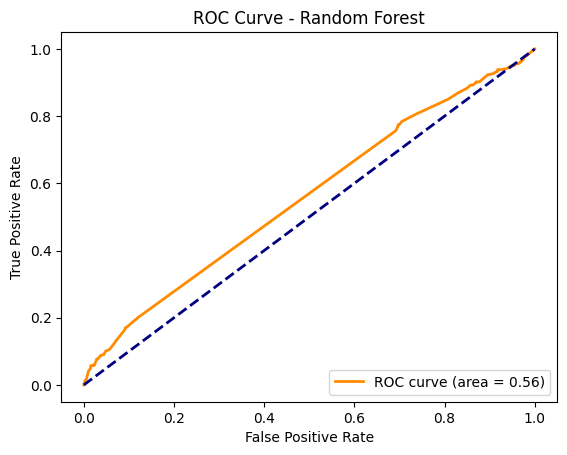

In [ ]:
# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Epoch 1/10
254/254 [==============================] - 2s 6ms/step - loss: 0.4292 - accuracy: 0.7660 - val_loss: 0.3391 - val_accuracy: 0.7858
Epoch 2/10
254/254 [==============================] - 1s 6ms/step - loss: 0.3137 - accuracy: 0.8233 - val_loss: 0.3351 - val_accuracy: 0.7996
Epoch 3/10
254/254 [==============================] - 2s 7ms/step - loss: 0.2793 - accuracy: 0.8543 - val_loss: 0.3526 - val_accuracy: 0.7996
Epoch 4/10
254/254 [==============================] - 2s 10ms/step - loss: 0.2476 - accuracy: 0.8777 - val_loss: 0.3649 - val_accuracy: 0.7922
Epoch 5/10
254/254 [==============================] - 2s 8ms/step - loss: 0.2144 - accuracy: 0.8985 - val_loss: 0.3967 - val_accuracy: 0.8016
Epoch 6/10
254/254 [==============================] - 1s 5ms/step - loss: 0.1809 - accuracy: 0.9169 - val_loss: 0.4247 - val_accuracy: 0.7986
Epoch 7/10
254/254 [==============================] - 1s 6ms/step - loss: 0.1421 - accuracy: 0.9397 - val_loss: 0.4623 - val_accuracy: 0.8050
Epoch

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Epoch 1/10
254/254 [==============================] - 2s 7ms/step - loss: 0.0512 - accuracy: 0.9723 - val_loss: 0.6649 - val_accuracy: 0.8021
Epoch 2/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0401 - accuracy: 0.9751 - val_loss: 0.7408 - val_accuracy: 0.8031
Epoch 3/10
254/254 [==============================] - 1s 6ms/step - loss: 0.0334 - accuracy: 0.9770 - val_loss: 0.7968 - val_accuracy: 0.8021
Epoch 4/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0210 - accuracy: 0.9785 - val_loss: 0.8483 - val_accuracy: 0.8001
Epoch 5/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0081 - accuracy: 0.9814 - val_loss: 0.9125 - val_accuracy: 0.8001
Epoch 6/10
254/254 [==============================] - 2s 6ms/step - loss: -0.0144 - accuracy: 0.9821 - val_loss: 1.0727 - val_accuracy: 0.7986
Epoch 7/10
254/254 [==============================] - 2s 8ms/step - loss: -0.0089 - accuracy: 0.9815 - val_loss: 1.0784 - val_accuracy: 0.7986
Epoc

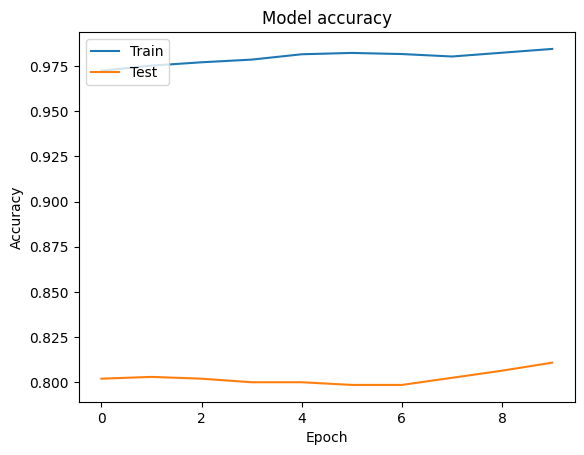

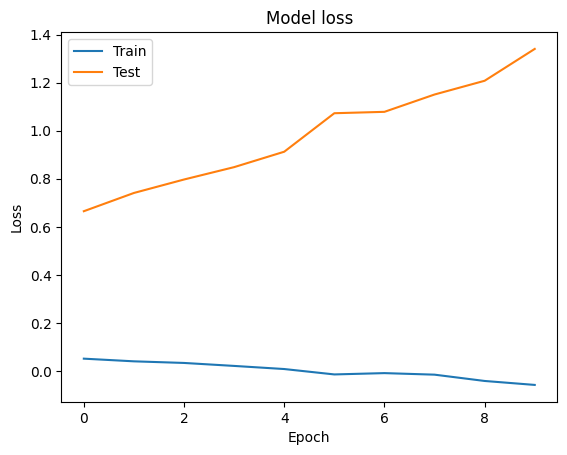

In [ ]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


In [ ]:
def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

In [ ]:
def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()

    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

In [ ]:
import plotly.graph_objects as go

def plot_signals(stock_data, portfolio,company):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    # Filter stock data to the date range available in the portfolio
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()
    # Add stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    # Add buy signals
    fig.add_trace(go.Scatter(
        x=buy_signals['date'],
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    # Add sell signals
    fig.add_trace(go.Scatter(
        x=sell_signals['date'],
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))
    # Update layout for better presentation
    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for {company}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

In [ ]:
def simulate_trades(stock_data, trading_signals,capital,company):
    # Construct file path based on company name
    file_path = f'merged_data_{company.capitalize()}.csv'

    try:
        # Fetch news data
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return

    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity =0
    for index, price in (stock_data['Close'].items()):
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital/price
                capital = capital%price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital':capital})
            elif signal == -1 and position == 1 and (price>buy_price) :  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price)*quantity
                capital = capital+ quantity*sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price,'capital':capital, 'profit': profit})

    return pd.DataFrame(portfolio)


In [ ]:
import pandas as pd

def final(rate, initial, company):
    # Construct file path based on company name
    file_path = f'merged_data_{company.capitalize()}.csv'

    try:
        # Fetch news data
        news_data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return

    # Assuming 'Date' and 'sentiment' columns exist in news_data
    news_data_with_scores = news_data[['Date', 'sentiment']]

    # Aggregate sentiment scores by date
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)

    # Generate trading signals
    trading_signals = generate_trading_signals(sentiment_summary)

    # Simulate trades
    print(f"\nSimulating trades for {company.capitalize()}...")
    portfolio = simulate_trades(news_data, trading_signals, initial,company)

    # Calculate portfolio metrics
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)

    # Print the portfolio
    print(portfolio)
    print(f"\nInitial capital: ${initial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio: {calculate_sharpe_ratio(portfolio, rate):.2f} with risk-free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")

    # Plot buy and sell signals
    plot_signals(news_data, portfolio,company)


In [ ]:
final(0.03, 10000,'Nvidia')


Simulating trades for Nvidia...
          date  type    price        capital        profit
0   2014-01-29   buy  0.38650       0.085475           NaN
1   2014-11-13  sell  0.48875   12645.622591   2645.537116
2   2014-10-30   buy  0.46725       0.436125           NaN
3   2015-01-29  sell  0.49450   13383.551488    737.492772
4   2015-03-27   buy  0.53450       0.205916           NaN
5   2015-11-20  sell  0.78475   19649.863110   6266.105705
6   2015-10-29   buy  0.69200       0.523908           NaN
7   2015-12-10  sell  0.82450   23412.826322   3762.439304
8   2016-01-15   buy  0.67775       0.630619           NaN
9   2016-11-29  sell  2.33125   80533.498104  57120.041163
10  2016-12-23   buy  2.74450       1.636899           NaN
11  2017-02-03  sell  2.85950   83909.648872   3374.513869
12  2017-02-10   buy  2.84050       1.275435           NaN
13  2017-10-30  sell  5.09600  150539.409377  66628.485070
14  2017-10-25   buy  4.84150       2.655926           NaN
15  2018-08-17  sell  6

In [ ]:
final(0.03, 10000,'Amazon')


Simulating trades for Amazon...
          date  type      price       capital       profit
0   2014-01-13   buy  19.549000     10.461109          NaN
1   2015-07-20  sell  24.405001  12494.476124  2484.015015
2   2015-07-10   buy  22.175501      9.669135          NaN
3   2015-08-19  sell  26.646000  15022.985480  2518.840221
4   2015-07-31   buy  26.807501     10.785010          NaN
5   2015-10-16  sell  28.538000  16003.546282   969.775792
6   2015-11-10   buy  32.984001      6.305720          NaN
7   2016-12-19  sell  38.299999  18589.127356  2579.275354
8   2017-02-09   buy  41.068001     26.390997          NaN
9   2017-05-19  sell  47.992001  21749.615736  3134.097384
10  2017-05-16   buy  48.303501     13.040228          NaN
11  2017-07-24  sell  51.947498  23403.438451  1640.782486
12  2017-07-25   buy  51.993500      6.363561          NaN
13  2018-01-11  sell  63.834000  28739.476133  5329.674121
14  2018-02-22   buy  74.266998     72.414793          NaN
15  2018-03-07  sell  7